<img src='images/header.png'>

# Personal Gym Recommmendation System

** The "Personal Gym Recommendation" project aims to build a system that helps gym-goers get a recommendation system that takes into account the specific fitness preferences for beginners **
###### © 2024 <a href='https://www.kaggle.com/'>Kaggle </a>. All rights reserved.

The dataset contains the following variables:

* **'1. Sex':** : Indicates the gender of the individual (Male/Female).
* **'2. Age':** Age of the individual in years.
* **'3. Height':** Height of the individual in meters.
* **'4. Weight':** Weight of the individual in kilograms.
* **'5. Hypertension':** Indicates whether the individual has hypertension (Yes/No).
* **'6. Diabetes':** Indicates whether the individual has diabetes (Yes/No).
* **'7. BMI':** Body Mass Index of the individual, calculated as weight in kilograms divided by the square of height in meters.
* **'8. Level':** : Categorizes the individual's weight status based on BMI (e.g., Underweight, Normal, Overweight, Obese).
* **'9. Lower Limmit':** (possibly meant to be "Lower Limit"): Lower limit of the standard weight range for the individual, based on height.
* **'10. Upper Limmit':** (possibly meant to be "Upper Limit"): Upper limit of the standard weight range for the individual, based on height.
* **'11. Standard Weight':** A range indicating the healthy or standard weight range for the individual, given in kilograms.
* **'12. Fat Percentage':** The percentage of the individual's weight that is fat.
* **'13. Fitness Goal':** The individual's fitness goal (e.g., Weight Gain, Weight Loss).
* **'14. Fitness Type:':** : Type of fitness the program is targeting (e.g., Muscular Fitness, Cardiovascular Fitness).
* **'15. Exercises':** Recommended exercises for the individual to meet their fitness goal.
* **'16. Equipment Required':** HThe equipment needed to perform the recommended exercises.
* **'17. Diet':** Recommended diet or foods for the individual to follow, aimed at supporting their fitness goal.
* **'18. Conclusion Recommendation':** A general conclusion or recommendation given to the individual based on their profile and fitness goals.

-------------

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN

--------------

### Reading Data & Check out the Data

In [2]:

df = pd.read_excel('dataset/gym recommendation.xlsx')

In [3]:
df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Lower Limmit,Upper Limmit,Standard Weight,Fat Percentage,Fitness Goal,Fitness Type,Exercises,Equipment Required,Diet,Conclusion Recommendation
0,Male,18,1.68,47.5,No,No,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),8.14,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,Male,18,1.68,47.5,Yes,No,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),8.14,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,Male,18,1.68,47.5,No,Yes,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),8.14,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),8.14,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,Male,18,1.68,47.5,No,No,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),8.14,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [4]:
df.shape

(14589, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        14589 non-null  object 
 1   Age                        14589 non-null  int64  
 2   Height                     14589 non-null  float64
 3   Weight                     14589 non-null  float64
 4   Hypertension               14589 non-null  object 
 5   Diabetes                   14589 non-null  object 
 6   BMI                        14589 non-null  float64
 7   Level                      14589 non-null  object 
 8   Lower Limmit               14589 non-null  float64
 9   Upper Limmit               14589 non-null  float64
 10  Standard Weight            14589 non-null  object 
 11  Fat Percentage             14589 non-null  float64
 12  Fitness Goal               14589 non-null  object 
 13  Fitness Type               14589 non-null  obj

In [6]:
df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'BMI',
       'Level', 'Lower Limmit', 'Upper Limmit', 'Standard Weight',
       'Fat Percentage', 'Fitness Goal', 'Fitness Type', 'Exercises',
       'Equipment Required', 'Diet', 'Conclusion Recommendation'],
      dtype='object')

-----------

### Checking any records in the dataset with (missing values, duplicates, etc) and hadling them.

In [7]:
# Check how many missing values in the dataset
print("The total missing values in this dataset:- " , len(df[df.isnull().any(axis=1)]))

The total missing values in this dataset:-  0


In [8]:
# Check how many duplicate values in the dataset
print("The total duplicate values in this dataset:- " , df.duplicated().sum())

The total duplicate values in this dataset:-  2437


In [9]:
# Handling duplicate values
# Dropping all duplicate values from the dataset permanently
df_unique = df.drop_duplicates()

In [10]:
# Overwrite the original dataframe with the unique one
df = df_unique

In [11]:
# Display the shape of the new dataframe to confirm duplicates have been removed
df.shape

(12152, 18)

---------------------------------

# Checking outliers

In [12]:
# Define a function to detect outliers based on the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Columns to check for outliers
columns_to_check = ['Age', 'Height', 'Weight', 'BMI', 'Lower Limmit', 'Upper Limmit', 'Fat Percentage']

# Calculate the number of outliers in each column
outliers_count = {column: detect_outliers_iqr(df, column) for column in columns_to_check}
outliers_count


{'Age': 0,
 'Height': 69,
 'Weight': 0,
 'BMI': 107,
 'Lower Limmit': 39,
 'Upper Limmit': 39,
 'Fat Percentage': 37}

-------------------

# Drop All Outliers from dataset

In [14]:
# Define a function to remove outliers based on the IQR method for a given column
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal for each column individually
df = df.copy()
for column in columns_to_check:
    df = remove_outliers_iqr(df, column)

# Check the new shape of the dataset to see how many records remain
df.shape

(11936, 18)

-------------------

### Describtive Statistics

In [15]:
df.describe()

,Age,Height,Weight,BMI,Lower Limmit,Upper Limmit,Fat Percentage
count,11936.000000,11936.00000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000
mean,39.372989,1.70165,69.791949,24.079377,53.738145,72.328794,26.057224
std,13.388718,0.09568,19.614286,6.364667,6.071906,8.171633,9.718803
min,18.000000,1.48000,32.000000,9.520000,40.520000,54.540000,0.740000
25%,28.000000,1.64000,54.000000,18.620000,49.760000,66.970000,19.070000
50%,38.000000,1.68000,69.000000,25.075000,52.210000,70.280000,25.825000
75%,51.000000,1.77000,85.000000,28.800000,57.960000,78.010000,32.670000
max,63.000000,1.94000,125.000000,43.820000,69.630000,93.710000,52.890000


---------------

### Visualizations for numerical variables using matplotlib 

In [16]:
# Set the aesthetics for the plots
sns.set_style("whitegrid")

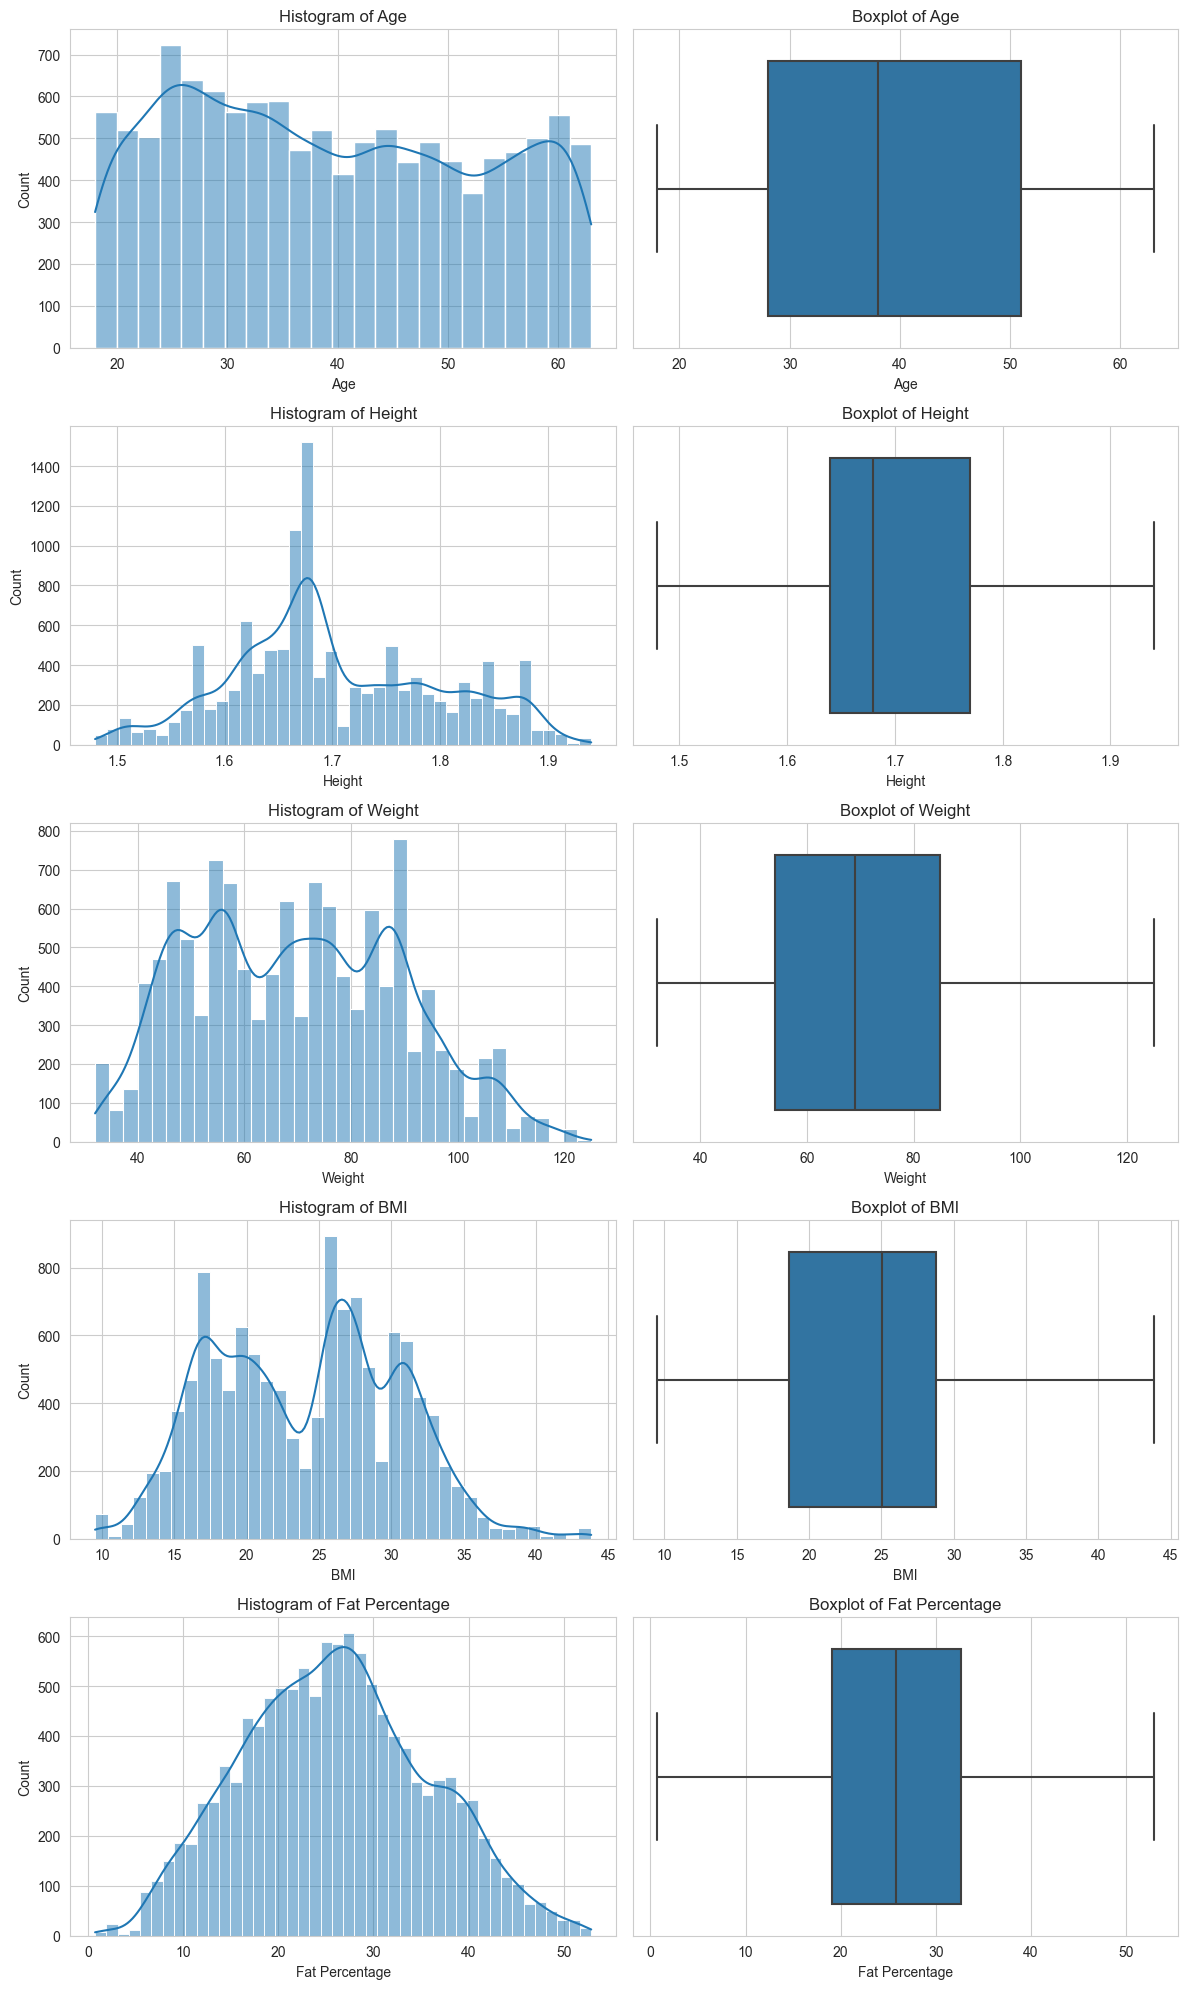

In [17]:
# Numerical columns to visualize with histogram and boxplot
numerical_columns = ['Age', 'Height', 'Weight', 'BMI', 'Fat Percentage']

# Set up the matplotlib figure with specified dimensions
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 4 * len(numerical_columns)))

# Loop through each numerical column to create both a histogram and a boxplot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    sns.boxplot(x=df[col], ax=axes[i, 1])
    
    # Set titles for clarity
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 1].set_title(f'Boxplot of {col}')

# Adjust layout for readability
plt.tight_layout()
plt.show()


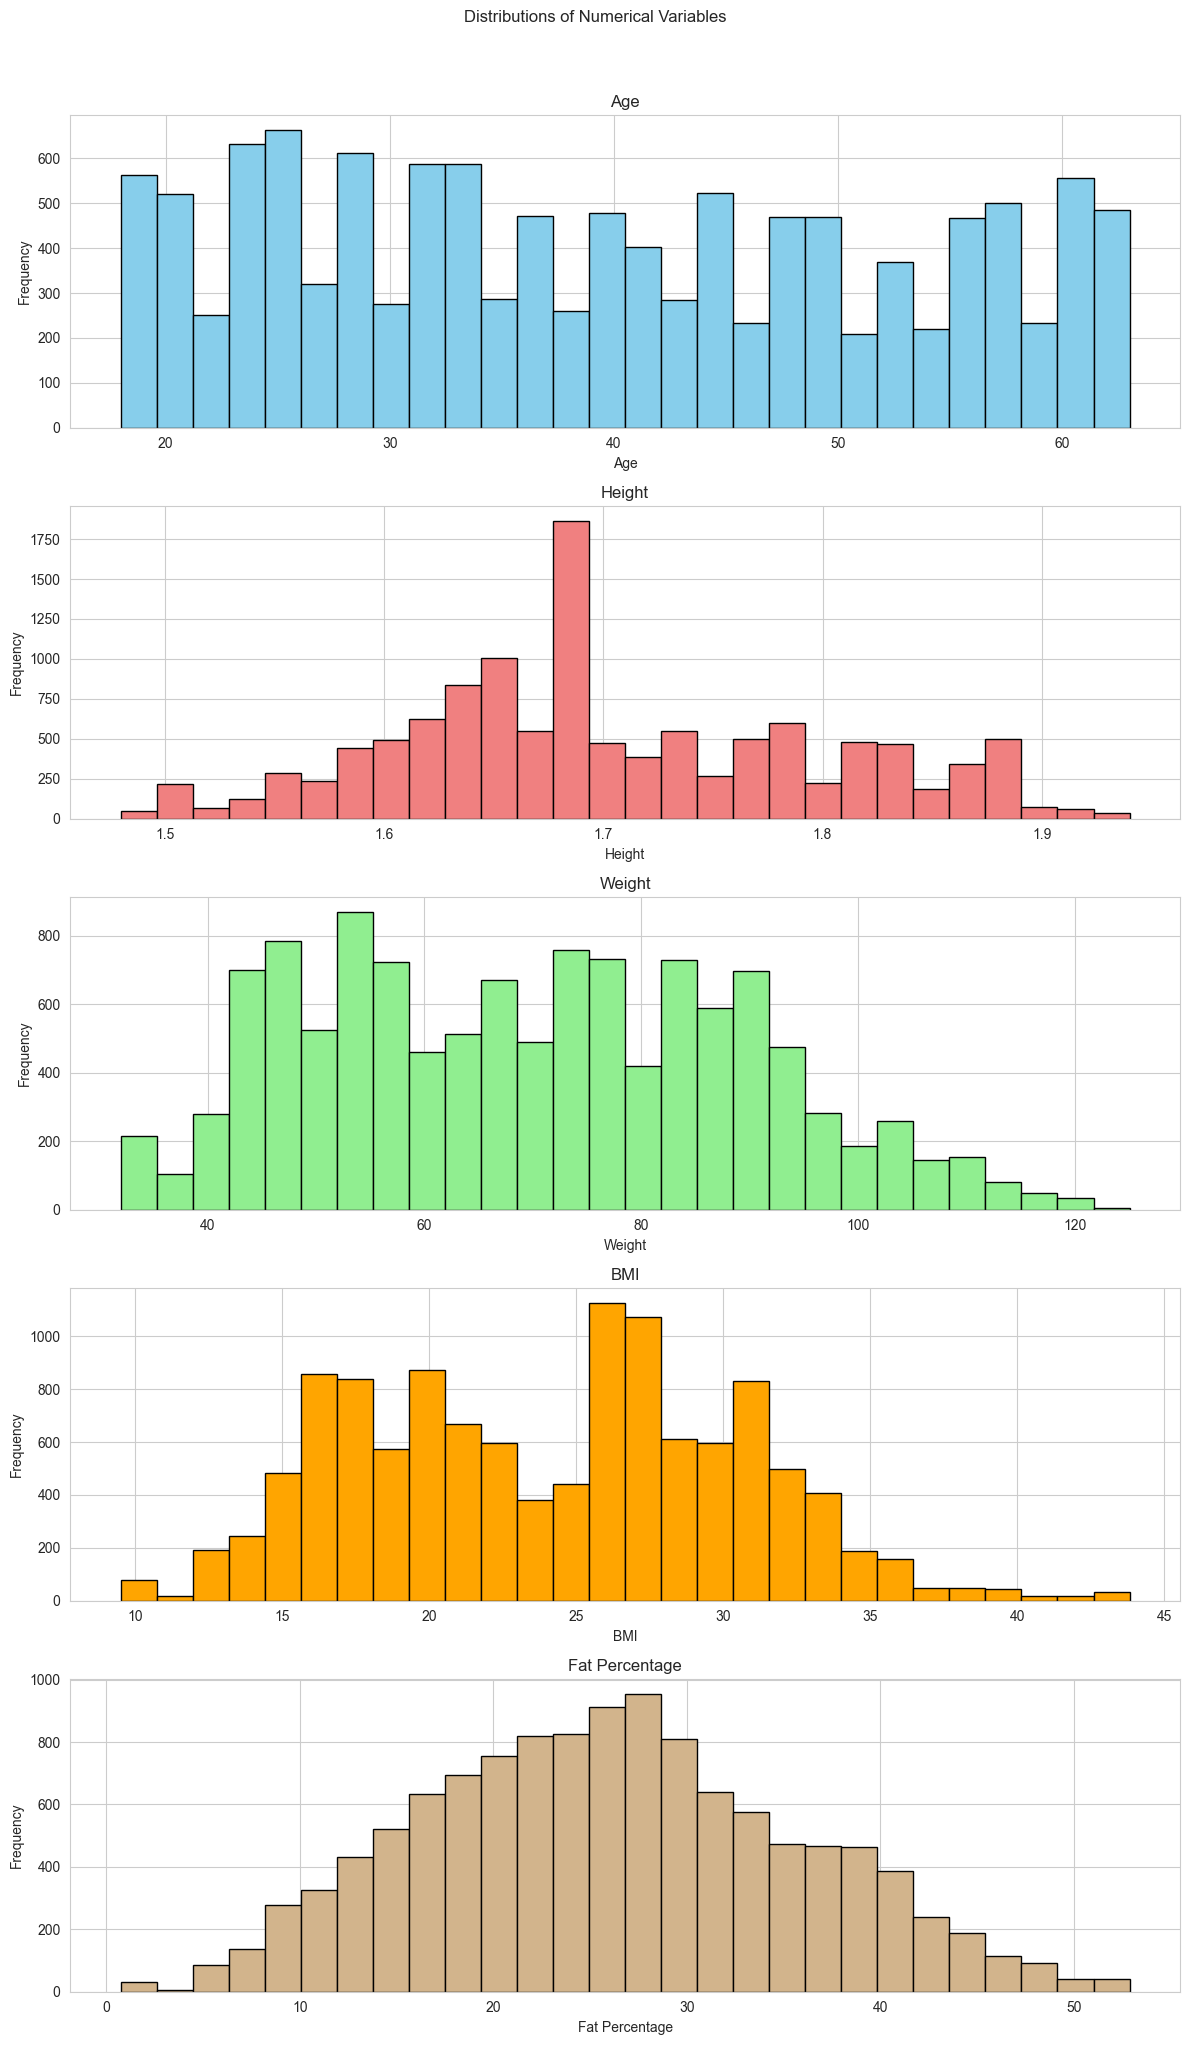

In [121]:
# List of numeric variables for visualization
numeric_vars = ['Age', 'Height', 'Weight', 'BMI', 'Fat Percentage']

# Define a list of colors for each variable
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'tan']

# Set up individual subplots in a single column
fig, axes = plt.subplots(nrows=len(numeric_vars), ncols=1, figsize=(12, 4 * len(numeric_vars)))
fig.suptitle('Distributions of Numerical Variables', y=1.02)

# Plot histograms for each numerical variable with different colors
for i, (col, color) in enumerate(zip(numeric_vars, colors)):
    ax = axes[i]
    ax.hist(df[col], bins=28, color=color, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


--------------

### Visualization Health Condition variables using matplotlib (Pie)

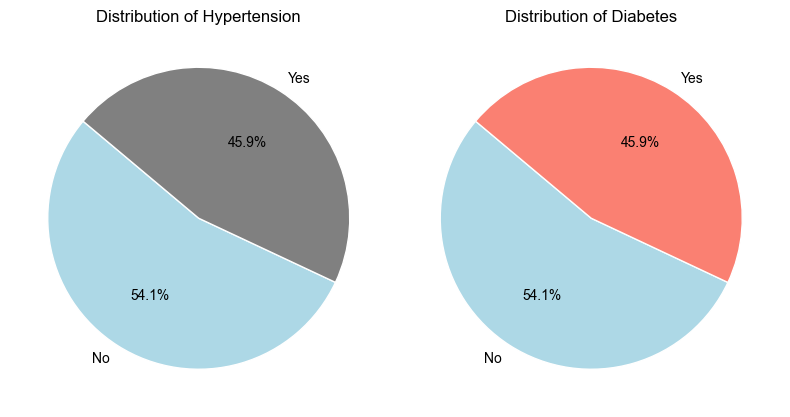

In [19]:
# Adjusting pie chart code with white font color
plt.figure(figsize=(8, 6))  # Setting the figure size for better visibility

# Pie Chart for Hypertension
plt.subplot(1, 2, 1)  # Position for Hypertension pie chart
hypertension_counts = df['Hypertension'].value_counts()
plt.pie(hypertension_counts, labels=hypertension_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'gray'],
        textprops={'color':"black"})
plt.title('Distribution of Hypertension', color='black')

# Pie Chart for Diabetes
plt.subplot(1, 2, 2)  # Position for Diabetes pie chart
diabetes_counts = df['Diabetes'].value_counts()
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'],
        textprops={'color':"black"})
plt.title('Distribution of Diabetes', color='black')

# Adjusting the background color for visibility of white text
plt.tight_layout()
plt.show()

----------------

### Visualization Categorical variables using matplotlib (bar chart)

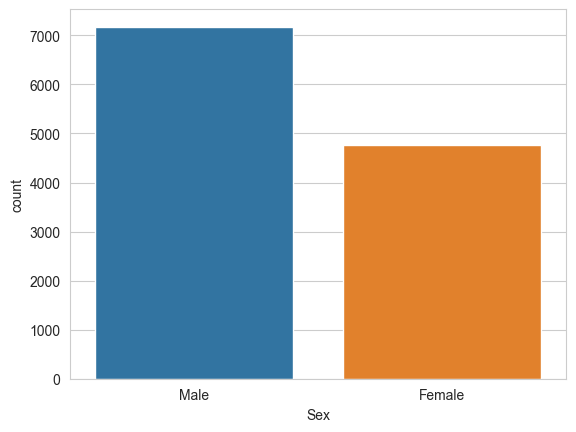

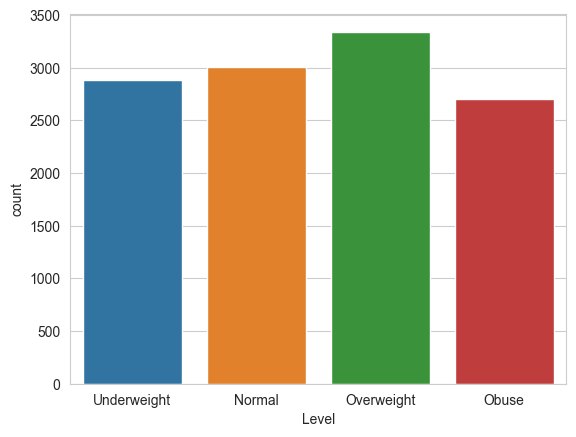

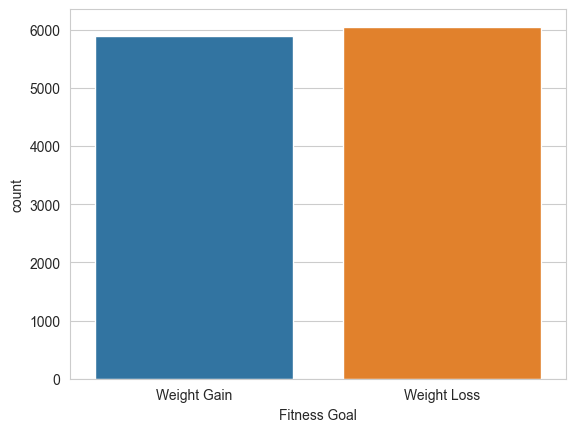

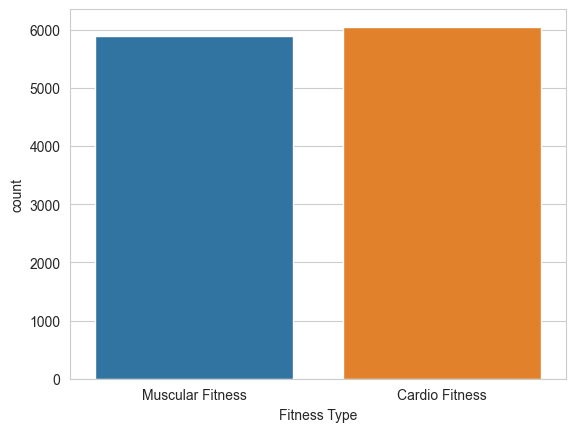

In [20]:
# List of categorical variables for visualization, excluding Hypertension and Diabetes
categorical_vars = df[['Sex', 'Level', 'Fitness Goal', 'Fitness Type']]
for i, predictor in enumerate(categorical_vars):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

-------------------

### Convert Categorical Variables (Sex, Hypertension, Diabetes) into dummy variables using LabelEncoder() and drop the original

In [21]:
lbl=LabelEncoder()
df.loc[:,'sex'] = lbl.fit_transform(df['Sex'])
df.loc[:,'hypertension'] = lbl.fit_transform(df['Hypertension'])
df.loc[:,'diabetes'] = lbl.fit_transform(df['Diabetes'])

In [22]:
df.head(2)

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Lower Limmit,Upper Limmit,...,Fat Percentage,Fitness Goal,Fitness Type,Exercises,Equipment Required,Diet,Conclusion Recommendation,sex,hypertension,diabetes
0,Male,18,1.68,47.5,No,No,16.83,Underweight,52.21,70.28,...,8.14,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...,1,0,0
1,Male,18,1.68,47.5,Yes,No,16.83,Underweight,52.21,70.28,...,8.14,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...,1,1,0


------------------------

### Drop (Sex, Hypertension, Diabetes) Variables 

In [23]:
df.drop('Sex', axis=1, inplace=True)
df.drop('Hypertension', axis=1, inplace=True)
df.drop('Diabetes', axis=1, inplace=True)

----------------------

# Building a RandomForestClassifier model for Categorical Variables

In [93]:
# Separate features (X) and target variable (y)
#display values, of dependant variable and indepentd
X = df[['sex','Age','Height', 'Weight','hypertension','diabetes']].values
y = df[['Level','Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment Required', 'Diet','Conclusion Recommendation']].values

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [95]:
# Create a RandomFores tree model
#random_forest_model = RandomForestRegressor()
random_forest_model =  MultiOutputClassifier(RandomForestClassifier(n_estimators=7,random_state=100))

In [96]:
# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=7,
                                                       random_state=100))

In [97]:
print("Random Forest Training Accuracy: ", round(random_forest_model.score(X_train,y_train)*100,2))
x_pred = random_forest_model.predict(X_test)
y_pred = random_forest_model.predict(X_train)
print("Random Forest Testing Accuracy: ", round(random_forest_model.score(X_test, y_test)*100,2))

Random Forest Training Accuracy:  98.1
Random Forest Testing Accuracy:  85.73


In [98]:
# Features
feature__random_forest_test = np.array([[1,18, 1.68,47.5,0,0]])
result_random_forest = random_forest_model.predict(feature__random_forest_test)

print(result_random_forest)
print()
print("==========================================================")


[['Underweight' 'Weight Gain' 'Muscular Fitness'
  'Squats, deadlifts, bench presses, and overhead presses'
  'Dumbbells and barbells'
  'Vegetables: (Carrots, Sweet Potato, and Lettuce); Protein Intake: (Red meats, poultry, fish, eggs, dairy products, legumes, and nuts); Juice: (Fruit juice, watermelon juice, carrot juice, apple juice and mango juice)'
  "Follow a regular exercise schedule. Adhere to the exercise and diet plan to get better results. It is important to approach weight gain in a healthy and balanced way, focusing on both exercise and nutrition. Keep in mind that weight gain should be gradual and focused on building lean muscle rather than increasing fat. Additionally, it's always a good idea to consult with a health care professional or registered dietitian before making any significant changes to your exercise or diet plan. Here are some important tips:- Stay hydrated by drinking enough water throughout the day. Monitor your progress and adjust your diet and exercise r

In [30]:
# prediction_random_forest = random_forest_model.predict(X_test)

In [31]:
# plt.scatter(y_test,prediction_random_forest)

# Building a RandomForestRegression model for Numeric Variables

In [32]:
# Separate features (X) and target variable (y)
#display values, of dependant variable and indepentd
X = df[['sex','Age','Height', 'Weight','hypertension','diabetes']].values
y = df[['BMI','Lower Limmit','Upper Limmit', 'Fat Percentage']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a RandomFores tree model
random_forest_model = RandomForestRegressor()

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

print("Random Forest (Numerical) Training Accuracy: ", round(random_forest_model.score(X_train,y_train)*100,2))

# Make predictions on the testing set
x_pred = random_forest_model.predict(X_test)
y_pred = random_forest_model.predict(X_train)
print("Random Forest (Numerical) Testing Accuracy: ", round(random_forest_model.score(X_test, y_test)*100,2))


Random Forest (Numerical) Training Accuracy:  99.99
Random Forest (Numerical) Testing Accuracy:  99.95


In [33]:
# Features
feature_test = np.array([[1,18, 1.82,75.5,0,0]])
result = random_forest_model.predict(feature_test)
print(result)
print("==========================================================")

[[21.8287 61.6846 83.027  16.8188]]


__________

# Building a DecisionTreeClassifier model for Categorical Variables

In [99]:
# Separate features (X) and target variable (y)
#display values, of dependant variable and indepentd
X = df[['sex','Age','Height', 'Weight','hypertension','diabetes']].values
y = df[['Level','Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment Required', 'Diet','Conclusion Recommendation']].values

In [100]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [101]:
dtree = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))

In [102]:
dtree.fit(X_train,y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42))

In [103]:
print("The Decision Tree Model Accurency For Training:- ", round(dtree.score(X_train, y_train)*100,2))
print("The Decision Tree Model Accurency For Testing:- ", round(dtree.score(X_test, y_test)*100, 2))

The Decision Tree Model Accurency For Training:-  99.4
The Decision Tree Model Accurency For Testing:-  86.4


In [104]:
# Features
feature_test = np.array([[1,18, 1.68,75.5,0,0]])
result = dtree.predict(feature_test)
print(result)
print("==========================================================")

[['Overweight' 'Weight Loss' 'Cardio Fitness'
  'Brisk walking, cycling, swimming, running , or dancing.'
  'Ellipticals, Indoor Rowers,Treadmills, Rowing machine'
  'Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, Aloe vera juice, Cold-pressed juice, and Watermelon juice)'
  "Follow a regular exercise schedule. Adhere to the exercise and diet plan to get better results. It is important to approach weight loss in a healthy and balanced way, focusing on exercise and nutrition. Keep in mind that weight loss should be gradual and focused on building lean muscle rather than increasing fat. Additionally, it's always a good idea to consult with a healthcare professional or registered dietitian before making any significant changes to your exercise or diet plan. Here are some important tips:- Stay hydrated by drinking enough water throughout the day. Monitor your progress and adjus

In [105]:
predictions = dtree.predict(X_test)

In [41]:
# print(classification_report(y_test, predictions))

In [42]:
# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy: {accuracy}")

-------------------------------------

# Using SMOTEENN To Improve Decision Tree accuracy

In [119]:
sm = SMOTEENN()
X_dt = df[['sex', 'Age', 'Height', 'Weight', 'hypertension', 'diabetes']].values
y_dt = df[['Level', 'Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment Required', 'Diet', 'Conclusion Recommendation']].values

# Splitting dataset
xdt_train, xdt_test, ydt_train, ydt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=100)

# Setting up and training the MultiOutputClassifier with RandomForest
model_dt_smote = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))
model_dt_smote.fit(xdt_train, ydt_train)

# Prediction
ydt_predict = model_dt_smote.predict(xdt_test)

# Evaluation
model_score_training = model_dt_smote.score(xdt_train, ydt_train)
model_score_testing = model_dt_smote.score(xdt_test, ydt_test)
print("After Model Improved the train is: ", round(model_score_training *100,2))
print("After Model Improved the test is: ", round(model_score_testing *100, 2))
# print(classification_report(yr_test, yr_predict))

After Model Improved the train is:  99.17
After Model Improved the test is:  88.07


-------------------------

# Building a DecisionTreeRegressor for Numerical

In [44]:
# Separate features (X) and target variable (y)
#display values, of dependant variable and indepentd
X = df[['sex','Age','Height', 'Weight','hypertension','diabetes']].values
y = df[['BMI','Lower Limmit','Upper Limmit', 'Fat Percentage']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dtree_numeric = DecisionTreeRegressor()

dtree_numeric.fit(X_train,y_train)
print("The Decision Tree Model (Numerical) Accurency For Training:- ", round(dtree_numeric.score(X_train, y_train)*100,2))
print("The Decision Tree Model (Numerical) Accurency For Testing:- ", round(dtree_numeric.score(X_test, y_test)*100,2))

The Decision Tree Model (Numerical) Accurency For Training:-  100.0
The Decision Tree Model (Numerical) Accurency For Testing:-  99.92


In [45]:
# Features
feature_test = np.array([[1,18, 1.68,75.5,0,0]])
result = dtree_numeric.predict(feature_test)
print(result)
print("==========================================================")

[[26.93 52.21 70.28 20.26]]


------------------

# Building a Linear Regression model

In [46]:
# Separate features (X) and target variable (y)
#display values, of dependant variable and indepentd
X = df[['sex','Age','Height', 'Weight','hypertension','diabetes']].values
y = df[['BMI','Lower Limmit','Upper Limmit', 'Fat Percentage']].values

## Train Test Split

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# Initialize the Linear Regression model
lin_reg = LinearRegression()

In [49]:
# Train the model on the training set
lin_reg.fit(X_train, y_train)
print("Linear Regression Model (Nemerical) Training: ", round(lin_reg.score(X_train,y_train)*100,2))

# Make predictions on the testing set
x_pred = lin_reg.predict(X_test)
y_pred = lin_reg.predict(X_train)
print("Linear Regression Model (Nemerical) Testing: ", round(lin_reg.score(X_test, y_test)*100,2))

Linear Regression Model (Nemerical) Training:  99.36
Linear Regression Model (Nemerical) Testing:  99.43


In [50]:
predictions = lin_reg.predict(X_test)

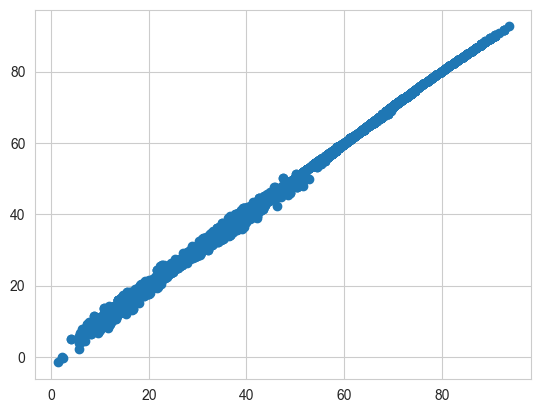

In [51]:
plt.scatter(y_test,predictions)

In [52]:
# Features
feature_test = np.array([[1,18, 1.68,47.5,1,1]])
result = lin_reg.predict(feature_test)
lower = result[:,1][0]
upper = result[:,2][0]
fat = result[:,3][0]

print(result)
print()
print("==========================================================")
print("Your BMI is:- ", round(result[:,0][0],2))
print("Your Lower Limmit is:- ", round(result[:,1][0],2))
print("Your Upper Limmit is:- ", round(result[:,2][0],2))
print(f'The Standard weight {round(lower,2)} (kg) - {round(upper,2)} (kg)')
print(f'Average Fat in Your Body is: {round(fat,2)}%')

[[17.1537683  52.33282065 70.4368017   8.52490838]]

Your BMI is:-  17.15
Your Lower Limmit is:-  52.33
Your Upper Limmit is:-  70.44
The Standard weight 52.33 (kg) - 70.44 (kg)
Average Fat in Your Body is: 8.52%


------------------

# Building a Logistic Regression model

In [60]:
# Separate features (X) and target variable (y)
#display values, of dependant variable and indepentd
X = df[['sex','Age','Height','Weight','hypertension','diabetes']].values
# y = df[['BMI','Lower Limmit','Upper Limmit','Fat Percentage']].values
y = df['Fitness Goal'].values

## Train Test Split

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
# Initialize the Linear Regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
# Train the model on the training set
logmodel.fit(X_train,y_train)
print(round(logmodel.score(X_train,y_train)*100,2))

98.53


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
# Make predictions on the testing set
x_pred = logmodel.predict(X_test)
y_pred = logmodel.predict(X_train)
print(round(logmodel.score(X_test, y_test)*100,2))

98.32


In [65]:
predictions_log = logmodel.predict(X_test)

In [66]:
# Features
feature_test = np.array([[1,18, 1.68,29,1,1]])
result = logmodel.predict(feature_test)

print(result)
print()
print("==========================================================")

['Weight Gain']



---------------------

# Building KNeighborsRegressor for Nemerical variables

In [67]:
# Separate features (X) and target variables (y)
X = df[['sex', 'Age', 'Height', 'Weight', 'hypertension', 'diabetes']].values
y = df[['BMI', 'Lower Limmit','Upper Limmit', 'Fat Percentage']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a multi-output KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=7)

# Train the model
knn_regressor.fit(X_train, y_train)

print("KNN - (Nemerical var) Accuracy Training:- ",round(knn_regressor.score(X_train,y_train)*100,2))
print("KNN - (Nemerical var) Accuracy Testing:- ", round(knn_regressor.score(X_test,y_test)*100,2))
# # Make predictions on the test data
# predictions = knn_regressor.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean Squared Error: {mse}')

KNN - (Nemerical var) Accuracy Training:-  89.17
KNN - (Nemerical var) Accuracy Testing:-  83.75


In [68]:
# Features
feature_test = np.array([[1,18, 1.68,99,1,1]])
result = knn_regressor.predict(feature_test)

print(result)
print()
print("==========================================================")

[[36.21       50.57285714 68.06285714 33.36285714]]



-----------------

# Building KNeighborsClassifier for catergorical varaibles

In [69]:
# Separate features (X) and multi-output target variables (y)
X = df[['sex', 'Age', 'Height', 'Weight', 'hypertension', 'diabetes']]
y = df[['Level','Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment Required', 'Diet','Conclusion Recommendation']]

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['sex', 'hypertension', 'diabetes'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Use MultiOutputClassifier to combine the classifiers
multi_output_classifier = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=100))

# Train the model
multi_output_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = multi_output_classifier.predict(X_test)
print("KNN (Categorical var) for Training Accorancy:- ", round(multi_output_classifier.score(X_train,y_train)*100,2))
print("KNN (Categorical var) for Testing Accorancy:-", round(multi_output_classifier.score(X_test,y_test)*100,2))


KNN (Categorical var) for Training Accorancy:-  16.1
KNN (Categorical var) for Testing Accorancy:- 12.81


In [70]:
# # Features
# feature_test = np.array([[1,18, 1.68,99,1,1]])
# result = multi_output_classifier.predict(feature_test)

# print(result)
# print()
# print("==========================================================")

-------------------

# Model Selection
**We selected a decision tree model for both numerical and categorical data**

In [113]:
# Separate features (X_lin) and target variable (y_lin)
X_dtree_num = df[['sex','Age','Height', 'Weight','hypertension','diabetes']].values
y_dtree_num = df[['BMI','Lower Limmit','Upper Limmit', 'Fat Percentage']].values

# Separate features (X_ran) and target variable (y_ran)
X_dtree_cat = df[['sex','Age','Height', 'Weight','hypertension','diabetes']].values
y_dtree_cat = df[['Level','Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment Required', 'Diet','Conclusion Recommendation']].values

# Split the data into training and testing sets
X_train_dtree_num, X_test_dtree_num, y_train_dtree_num, y_test_dtree_num = train_test_split(X_dtree_num, y_dtree_num, test_size=0.3)
X_train_dtree_cat, X_test_dtree_cat, y_train_dtree_cat, y_test_dtree_cat = train_test_split(X_dtree_cat, y_dtree_cat, test_size=0.3, random_state=101)

dtree_numeric_var = DecisionTreeRegressor()
dtree_numeric_var.fit(X_train_dtree_num,y_train_dtree_num)

dtree_categorical_var = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))
dtree_categorical_var.fit(X_train_dtree_cat, y_train_dtree_cat)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42))

In [114]:
print("The decision Tree (Numerical var) Accurency For Training:- ", round(dtree_numeric_var.score(X_train_dtree_num, y_train_dtree_num)*100,2))
print("The decision Tree (Numerical var) Accurency For Testing:- ", round(dtree_numeric_var.score(X_test_dtree_num, y_test_dtree_num)*100,2))
print("The decision tree (Categorical var) Accurency For Training: ", round(dtree_categorical_var.score(X_train_dtree_cat, y_train_dtree_cat)*100,2))
print("The decision tree (Categorical var) Accurency For Testing: ", round(dtree_categorical_var.score(X_test_dtree_cat, y_test_dtree_cat)*100,2))

The decision Tree (Numerical var) Accurency For Training:-  100.0
The decision Tree (Numerical var) Accurency For Testing:-  99.93
The decision tree (Categorical var) Accurency For Training:  99.29
The decision tree (Categorical var) Accurency For Testing:  87.99


In [117]:
# Features
feature_test = np.array([[1,21, 1.81,95,0,0]])
result_dtree_num = dtree_numeric_var.predict(feature_test)
result_dtree_cat = dtree_categorical_var.predict(feature_test)
# print(result_lin)
# print(result_ran)
lower = result_dtree_num[:,1][0]
upper = result_dtree_num[:,2][0]
fat = result_dtree_num[:,3][0]
level = result_dtree_cat[:,0][0]
goal = result_dtree_cat[:,1][0]
fType = result_dtree_cat[:,2][0]
exercise = result_dtree_cat[:,3][0]
equip = result_dtree_cat[:,4][0]
diet = result_dtree_cat[:,5][0]
conRec = result_dtree_cat[:,6][0]

print()

print("==========================================================")
print("Your BMI is: ", round(result_dtree_num[:,0][0],2))
print()
print("Your Lower Limmit is: -", round(lower,2))
print()
print("Your Upper Limmit is:-", round(upper,2))
print()
print(f'The Standard weight:- {round(lower,2)} (kg) - {round(upper,2)} (kg)')
print()
print(f'Average Fat in Your Body is: {round(fat,2)}%')
print()
print(f'Your Level is:- {level}')
print()
print(f'Your Fitness Goal:- {goal}')
print()
print(f'Your Fitness Type is:- {fType}')
print()
print(f'Excercise Recommendation:- {exercise}')
print()
print(f'Equipment Required:- {equip}')
print()
print(f'Diet Recommendation:- {diet}')
print()
print(f'Conclusion Recommendation:- {conRec}')
print()


Your BMI is:  29.94

Your Lower Limmit is: - 59.94

Your Upper Limmit is:- 80.68

The Standard weight:- 59.94 (kg) - 80.68 (kg)

Average Fat in Your Body is: 26.17%

Your Level is:- Overweight

Your Fitness Goal:- Weight Loss

Your Fitness Type is:- Cardio Fitness

Excercise Recommendation:- Brisk walking, cycling, swimming, running , or dancing.

Equipment Required:- Ellipticals, Indoor Rowers,Treadmills, and Rowing machine

Diet Recommendation:- Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, Aloe vera juice, Cold-pressed juice, and Watermelon juice)

Conclusion Recommendation:- Follow a regular exercise schedule. Adhere to the exercise and diet plan to get better results. It is important to approach weight loss in a healthy and balanced way, focusing on exercise and nutrition. Keep in mind that weight loss should be gradual and focused on building lean muscle rather than

----------------

# Hyper Parameter Tunning

In [74]:
from sklearn.model_selection import GridSearchCV

In [120]:
# Define the hyperparameter grid
# Separate features (X) and target variable (y)
#display values, of dependant variable and indepentd
X = df[['sex','Age','Height', 'Weight','hypertension','diabetes']].values
y = df[['Level','Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment Required', 'Diet','Conclusion Recommendation']].values

param_grid = {
    'estimator__max_depth': [None, 10, 20, 30],  # You can expand this range
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__criterion': ['gini', 'entropy']
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the MultiOutputClassifier with DecisionTreeClassifier and use GridSearchCV
grid_search = GridSearchCV(MultiOutputClassifier(DecisionTreeClassifier(random_state=42)),
                           param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator from the grid search
best_dtree = grid_search.best_estimator_

# Evaluate the accuracy on the training and testing sets using the best estimator
print("The Decision Tree Model Accuracy For Training:", round(best_dtree.score(X_train, y_train)*100,2))
print("The Decision Tree Model Accuracy For Testing:", round(best_dtree.score(X_test, y_test)*100,2))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2}
The Decision Tree Model Accuracy For Training: 99.2
The Decision Tree Model Accuracy For Testing: 89.49


--------------------

# Model Saving

In [ ]:
# from joblib import dump

# # Save Linear Regression model
# dump(dtree_numeric_var, 'models/decision_tree_regressor.joblib')

# # Save Random Forest model
# dump(dtree_categorical_var, 'models/decision_tree_classifier.joblib')


-------------------------

### End Project